# Quantify Builds

In this notebook, the key perfomance indicators that we would like to create greater visbility into and track over time is the percent of builds that passed/failed. This can be used to capture the build success rate ie. number of successful builds / deployments relative to the total number of builds / deployments.

* number and percent of builds passed and failed
* plot of build pass and failure over time

In [20]:
import gzip
import json
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../..")

module_path_1 = os.path.abspath(os.path.join("../../../data-sources/TestGrid"))
if module_path_1 not in sys.path:
    sys.path.append(module_path_1)

from ipynb.fs.defs.number_of_flakes import (  # noqa: E402
    testgrid_labelwise_encoding,
)  # noqa: E402

In [21]:
# Load test file
with gzip.open("../../../../data/raw/testgrid_810.json.gz", "rb") as read_file:
    testgrid_data = json.load(read_file)

In [22]:
build_failures_list = testgrid_labelwise_encoding(testgrid_data, 12)

In [23]:
len(build_failures_list)

19483548

In [24]:
build_failures_list[0]

(datetime.datetime(2020, 10, 8, 20, 48, 5),
 '"redhat-openshift-informing"',
 'release-openshift-okd-installer-e2e-aws-upgrade',
 'Application behind service load balancer with PDB is not disrupted',
 False)

In [25]:
# Convert to dataframe
build_failures_df = pd.DataFrame(
    build_failures_list, columns=["timestamp", "tab", "job", "test", "build_failure"]
)
build_failures_df.head()

,timestamp,tab,job,test,build_failure
0,2020-10-08 20:48:05,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
1,2020-10-08 19:12:01,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,True
2,2020-10-08 14:18:13,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
3,2020-10-08 11:15:28,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
4,2020-10-08 08:27:53,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False


In [26]:
build_failures_df = build_failures_df.loc[build_failures_df['test'] == "Overall"]

In [27]:
build_failures_df.head()

,timestamp,tab,job,test,build_failure
590,2020-10-08 20:48:05,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
591,2020-10-08 19:12:01,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
592,2020-10-08 14:18:13,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
593,2020-10-08 11:15:28,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
594,2020-10-08 08:27:53,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False


In [28]:
# saving only the first 1000000 out of 19 million rows due to pvc limits.
# 250mb = 1 million --> 4750 mb = 19 million
build_failures_df.to_csv(
    "../../../../data/processed/build_failures.csv",
    header=False,
)

In [29]:
build_passing_list = testgrid_labelwise_encoding(testgrid_data, 1)

In [30]:
# Convert to dataframe
build_passing_df = pd.DataFrame(
    build_passing_list, columns=["timestamp", "tab", "job", "test", "build_passing"]
)
build_passing_df.head()

,timestamp,tab,job,test,build_passing
0,2020-10-08 20:48:05,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
1,2020-10-08 19:12:01,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
2,2020-10-08 14:18:13,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
3,2020-10-08 11:15:28,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False
4,2020-10-08 08:27:53,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Application behind service load balancer with ...,False


In [31]:
build_passing_df = build_passing_df.loc[build_passing_df['test'] == "Overall"]

In [32]:
build_passing_df.head()

,timestamp,tab,job,test,build_passing
590,2020-10-08 20:48:05,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
591,2020-10-08 19:12:01,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
592,2020-10-08 14:18:13,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
593,2020-10-08 11:15:28,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
594,2020-10-08 08:27:53,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False


In [33]:
# saving only the first 1000000 out of 19 million rows due to pvc limits.
# 250mb = 1 million --> 4750 mb = 19 million
build_passing_df.to_csv(
    "../../../../data/processed/build_pass.csv",
    header=False,
)

## Number and percent of builds passed and failed

In [34]:
# Metrics
no_tests = build_passing_df.test.count()
print("Total number of Builds: %i" % (no_tests))
no_failures = build_failures_df.build_failure.sum()
print("Total number of failing builds: %i" % (no_failures))
build_failures_percentage = (
    (
        build_failures_df.build_failure.sum()
        / build_failures_df.test.count()
    )
) * 100
print("Build failure percentage: %f" % (build_failures_percentage))
no_pass = build_passing_df.build_passing.sum()
print("Total number of passing builds: %i" % (no_pass))
build_pass_percentage = (
    (
        build_passing_df.build_passing.sum()
        / build_passing_df.test.count()
    )
) * 100
print("Build pass percentage: %f" % (build_pass_percentage))

Total number of Builds: 32734
Total number of failing builds: 13928
Build failure percentage: 42.549032
Total number of passing builds: 13449
Build pass percentage: 41.085721


## Plot of build pass and failure over time

In [35]:
def plot_builds_tab_grid(tab, job, df):
    
    """
    Takes in input as tab and grid and plots change in 
    build pass/fail over time
    """
    
    df = df[(df["tab"] == tab) | (df["job"] == job)]
    
    sns.set(rc={"figure.figsize": (15, 5)})
    sns.lineplot(x="timestamp", y="build_status", data=df)
    plt.xlabel("Timestamps")
    plt.ylabel("Build Pass or Fail")
    plt.title("Change in Build Pass or Failure over time")
    plt.show()

In [36]:
combined = pd.merge(build_failures_df,build_passing_df,on=['timestamp', 'tab', 'job', 'test'])

In [37]:
combined

,timestamp,tab,job,test,build_failure,build_passing
0,2020-10-08 20:48:05,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False
1,2020-10-08 19:12:01,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,True
2,2020-10-08 14:18:13,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False
3,2020-10-08 11:15:28,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False
4,2020-10-08 08:27:53,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False
...,...,...,...,...,...,...
32871,2020-09-25 08:01:10,"""redhat-osde2e-stage-moa""",osde2e-stage-moa-e2e-upgrade-default-next,Overall,False,True
32872,2020-09-25 00:01:27,"""redhat-osde2e-stage-moa""",osde2e-stage-moa-e2e-upgrade-default-next,Overall,False,True
32873,2020-09-24 16:00:30,"""redhat-osde2e-stage-moa""",osde2e-stage-moa-e2e-upgrade-default-next,Overall,False,True
32874,2020-09-24 08:00:46,"""redhat-osde2e-stage-moa""",osde2e-stage-moa-e2e-upgrade-default-next,Overall,False,True


In [38]:
def label_race (row):
   if row['build_failure']:
      return 'Fail'

   if row['build_passing']:
      return 'Pass'

In [39]:
combined['build_status']=combined.apply (lambda row: label_race(row), axis=1)

In [40]:
combined.head()

,timestamp,tab,job,test,build_failure,build_passing,build_status
0,2020-10-08 20:48:05,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False,None
1,2020-10-08 19:12:01,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,True,Pass
2,2020-10-08 14:18:13,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False,None
3,2020-10-08 11:15:28,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False,None
4,2020-10-08 08:27:53,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False,None


In [41]:
len(combined)

32876

In [42]:
# since we are only interested in success and failure statuses
combined = combined.dropna()

In [43]:
len(combined)

27489

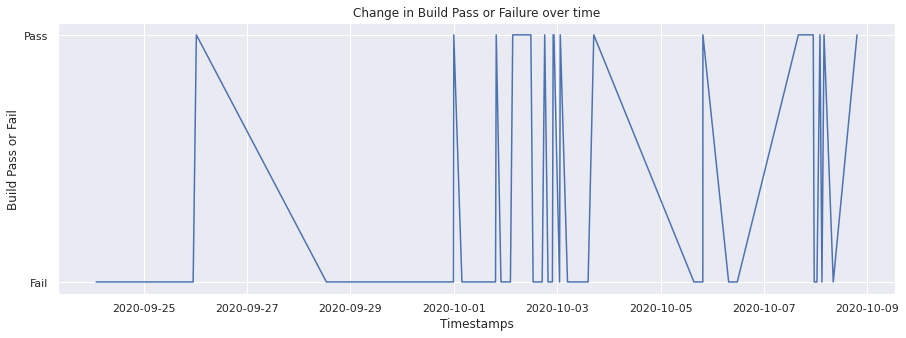

In [44]:
plot_builds_tab_grid("redhat-openshift-informing", "release-openshift-okd-installer-e2e-aws-upgrade", combined)

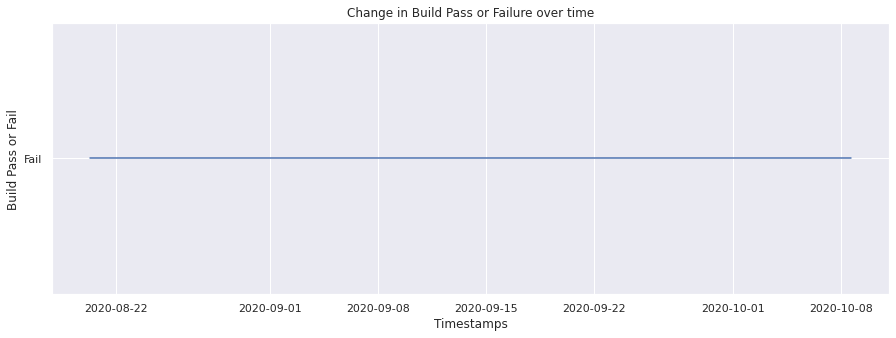

In [45]:
plot_builds_tab_grid("redhat-openshift-ocp-release-4.2-informing", "release-openshift-origin-installer-e2e-aws-upgrade-rollback-4.1-to-4.2", combined)

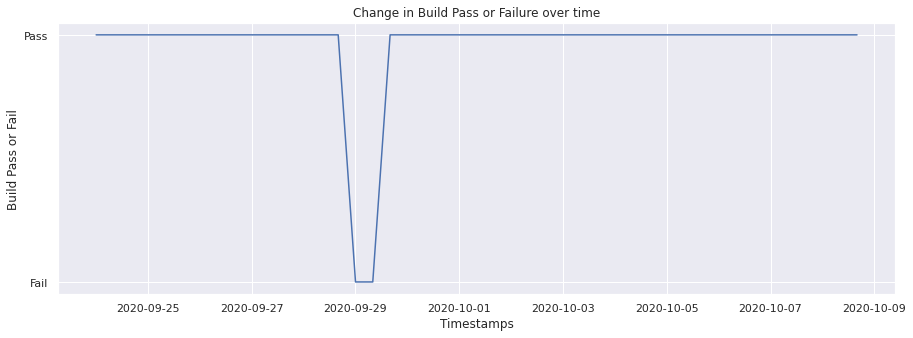

In [46]:
plot_builds_tab_grid("redhat-osde2e-stage-moa", "osde2e-stage-moa-e2e-upgrade-default-next", combined)

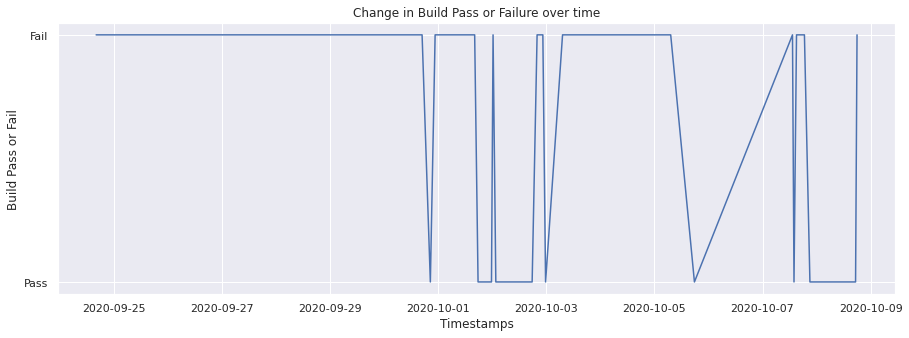

In [47]:
plot_builds_tab_grid("redhat-openshift-ocp-release-4.5-blocking","release-openshift-origin-installer-e2e-gcp-serial-4.5",combined)

### Conclusion

In this Notebook, we use the "Overall" as a proxy for a build. Testgrid refers an aggregate of multiple tests performed at a certain timestamp within a Job as a Build and each build has a unique Build ID. In this notebook, we went ahead and used the labels provided by testgrid which classify a test overall as Pass or Fail to indicate build success and failures and thus calculate the percent of success and failures.